In [14]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremynagel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jeremynagel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import seaborn as sns
from wordcloud import WordCloud


In [16]:
import pandas as pd
from langdetect import detect, DetectorFactory

# To ensure consistent results from langdetect
DetectorFactory.seed = 0

# Load your data
feedback_data = pd.read_csv('feedback.csv')

# Define a function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "error"  # Return "error" if language detection fails

# Apply the language detection function to the feedback column
feedback_data['language'] = feedback_data['feedback'].apply(detect_language)

# Filter to keep only English feedback
english_feedback = feedback_data[feedback_data['language'] == 'en']

# Optionally, you can drop the language column if it's no longer needed
english_feedback = english_feedback.drop('language', axis=1)

# Save or continue processing the filtered data
english_feedback.to_csv('english_feedback.csv', index=False)


In [17]:

# Load your data
feedback_data = english_feedback


In [18]:
sentiment_counts = feedback_data['sentiment'].value_counts()
average_score = feedback_data['sentiment'].replace({'Positive': 1, 'Neutral': 0, 'Negative': -1}).mean()

# Visualize the distribution of sentiments
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print summary statistics
print("Sentiment Counts:")
print(sentiment_counts)
print("\nAverage Sentiment Score (1 for Positive, -1 for Negative, 0 for Neutral):")
print(average_score)

# Optionally, categorize feedback based on content (simple keyword-based example)
keywords = {
    'usability': ['easy', 'hard', 'difficult', 'user-friendly'],
    'performance': ['fast', 'slow', 'performance'],
    'features': ['feature', 'wish', 'need', 'missing']
}

def categorize_feedback(text):
    categories = []
    for category, words in keywords.items():
        if any(word in text.lower() for word in words):
            categories.append(category)
    return ', '.join(categories) if categories else 'Other'

# Apply categorization
feedback_data['category'] = feedback_data['feedback'].apply(categorize_feedback)

# Print example categorizations
print("\nFeedback Categories:")
print(feedback_data[['feedback', 'category']].head())

KeyError: 'sentiment'

In [ ]:

# Histogram of Ratings
plt.figure(figsize=(8, 4))
sns.histplot(feedback_data['rating'], bins=10, kde=False, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:

# Word Cloud
text = " ".join(review for review in feedback_data.feedback)
word_cloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('./wordcloud.png')
plt.show()


In [ ]:

# Text Analysis: Top Common Words
vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(feedback_data['feedback'])
sum_words = word_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
print("Top 10 Common Words:")
print(words_freq[:10])

# Additional analysis can be added here

/var/folders/lj/zshs5rxs1hn0jh15sbt8ngv40000gn/T/ipykernel_88691/879939483.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  feedback_data['year_month'] = feedback_data['created_at'].dt.to_period('M')


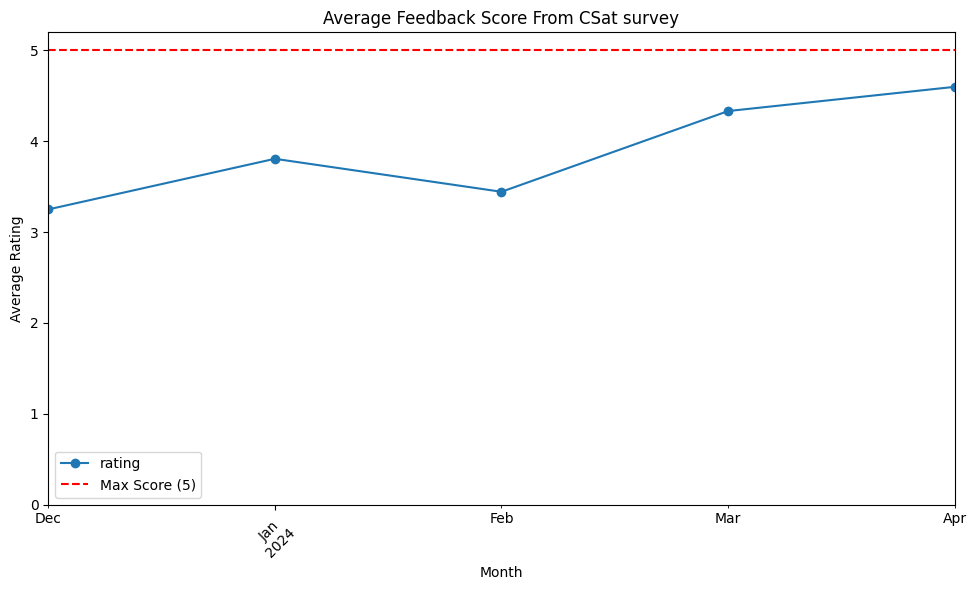

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
feedback_data = pd.read_csv('feedback.csv')

feedback_data['created_at'] = pd.to_datetime(feedback_data['created_at'], format='%Y-%m-%d %H:%M:%S.%f %z', utc=True)

# Convert the 'created_at' column to datetime
feedback_data['created_at'] = pd.to_datetime(feedback_data['created_at'])

# Extract year and month from the datetime
feedback_data['year_month'] = feedback_data['created_at'].dt.to_period('M')

# Group by the new 'year_month' column and calculate the average rating
monthly_average = feedback_data.groupby('year_month')['rating'].mean()

# Filter the data to include only December onwards
start_period = pd.Period('2023-12', freq='M')
filtered_data = feedback_data[feedback_data['year_month'] >= start_period]

# Group by the new 'year_month' column and calculate the average rating
monthly_average = filtered_data.groupby('year_month')['rating'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
monthly_average.plot(kind='line', marker='o', linestyle='-')
plt.title('Average Feedback Score From CSat survey')
plt.xlabel('Month')
plt.grid(False)  # Turn off the grid
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.ylim(bottom=0, top=5.2)

plt.axhline(y=5, color='r', linestyle='--', label='Max Score (5)')
plt.legend()

plt.savefig('average_feedback_score_from_csat_survey_last_4_months.png')

plt.show()

In [21]:
file_path = './impact_data.csv'

# Specify the columns that need to be parsed as dates
date_cols = ['log_time', 'user_created_time']

# Try reading the file with explicit date parsing
try:
    impact_data = pd.read_csv(file_path, parse_dates=date_cols)
    # Display the first few rows and column names to understand its structure
    output = (impact_data.head(), impact_data.columns)
except Exception as e:
    output = str(e)

output

(                           log_time                 user_created_time  \
 0  2023-12-01 22:41:45.194000+11:00  2023-06-12 22:34:32.622000+10:00   
 1  2023-12-01 22:41:52.015000+11:00  2023-06-12 22:34:32.622000+10:00   
 2  2024-04-04 06:41:29.535000+11:00  2022-08-28 20:42:11.356000+10:00   
 3  2023-10-06 20:00:10.010000+11:00  2023-09-14 21:11:12.348000+10:00   
 4  2023-09-29 17:23:46.048000+10:00  2023-09-23 13:12:34.375000+10:00   
 
                impact_category  logged_value  
 0  energy_level_upon_awakening          7.80  
 1                         mood          8.20  
 2  energy_level_upon_awakening          5.00  
 3   perception_of_productivity          8.13  
 4  energy_level_upon_awakening          5.00  ,
 Index(['log_time', 'user_created_time', 'impact_category', 'logged_value'], dtype='object'))

In [22]:
# Manually parse the date columns
impact_data['log_time'] = pd.to_datetime(impact_data['log_time'], format='%Y-%m-%d %H:%M:%S.%f %z', utc=True)
impact_data['user_created_time'] = pd.to_datetime(impact_data['user_created_time'], format='%Y-%m-%d %H:%M:%S.%f %z', utc=True)

# Calculate the days since signup
impact_data['days_since_signup'] = (impact_data['log_time'].dt.tz_localize(None) - impact_data['user_created_time'].dt.tz_localize(None)).dt.days


In [23]:
# Grouping data and calculating mean values for each impact category over time
grouped_data = impact_data.groupby(['days_since_signup', 'impact_category']).median()
print(grouped_data.reset_index())


      days_since_signup              impact_category  \
0                     0  energy_level_upon_awakening   
1                     0               hours_of_sleep   
2                     0                         mood   
3                     0   perception_of_productivity   
4                     1  energy_level_upon_awakening   
...                 ...                          ...   
1815                604               hours_of_sleep   
1816                604                         mood   
1817                605  energy_level_upon_awakening   
1818                605               hours_of_sleep   
1819                605                         mood   

                                log_time                   user_created_time  \
0    2024-03-10 13:09:14.255000064+00:00    2024-03-09 16:54:09.668000+00:00   
1    2024-03-05 01:40:11.537500160+00:00 2024-03-04 05:42:14.162500096+00:00   
2    2024-03-10 13:09:33.228999936+00:00    2024-03-09 16:54:09.668000+00:00   
3    20

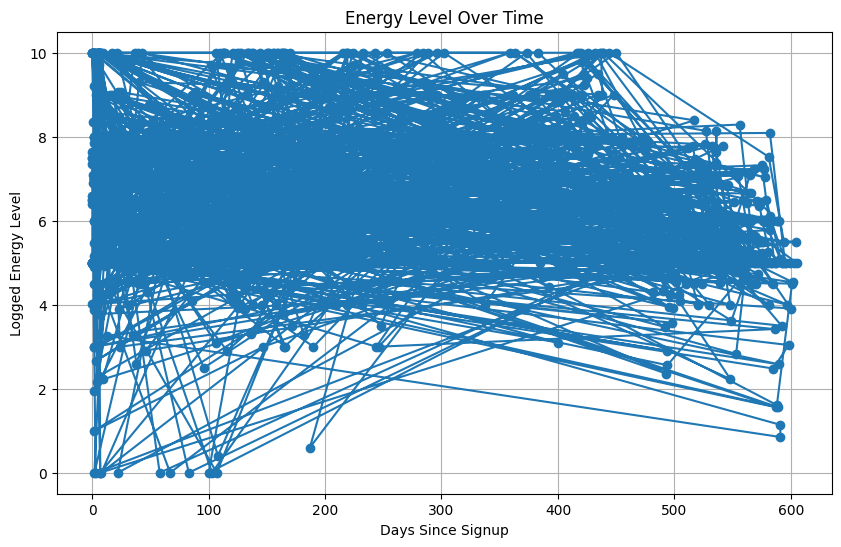

In [24]:
import matplotlib.pyplot as plt

# Assuming you're interested in visualizing 'energy_level_upon_awakening'
energy_data = impact_data[impact_data['impact_category'] == 'energy_level_upon_awakening']
plt.figure(figsize=(10, 6))
plt.plot(energy_data['days_since_signup'], energy_data['logged_value'], marker='o', linestyle='-')
plt.title('Energy Level Over Time')
plt.xlabel('Days Since Signup')
plt.ylabel('Logged Energy Level')
plt.grid(True)
plt.show()


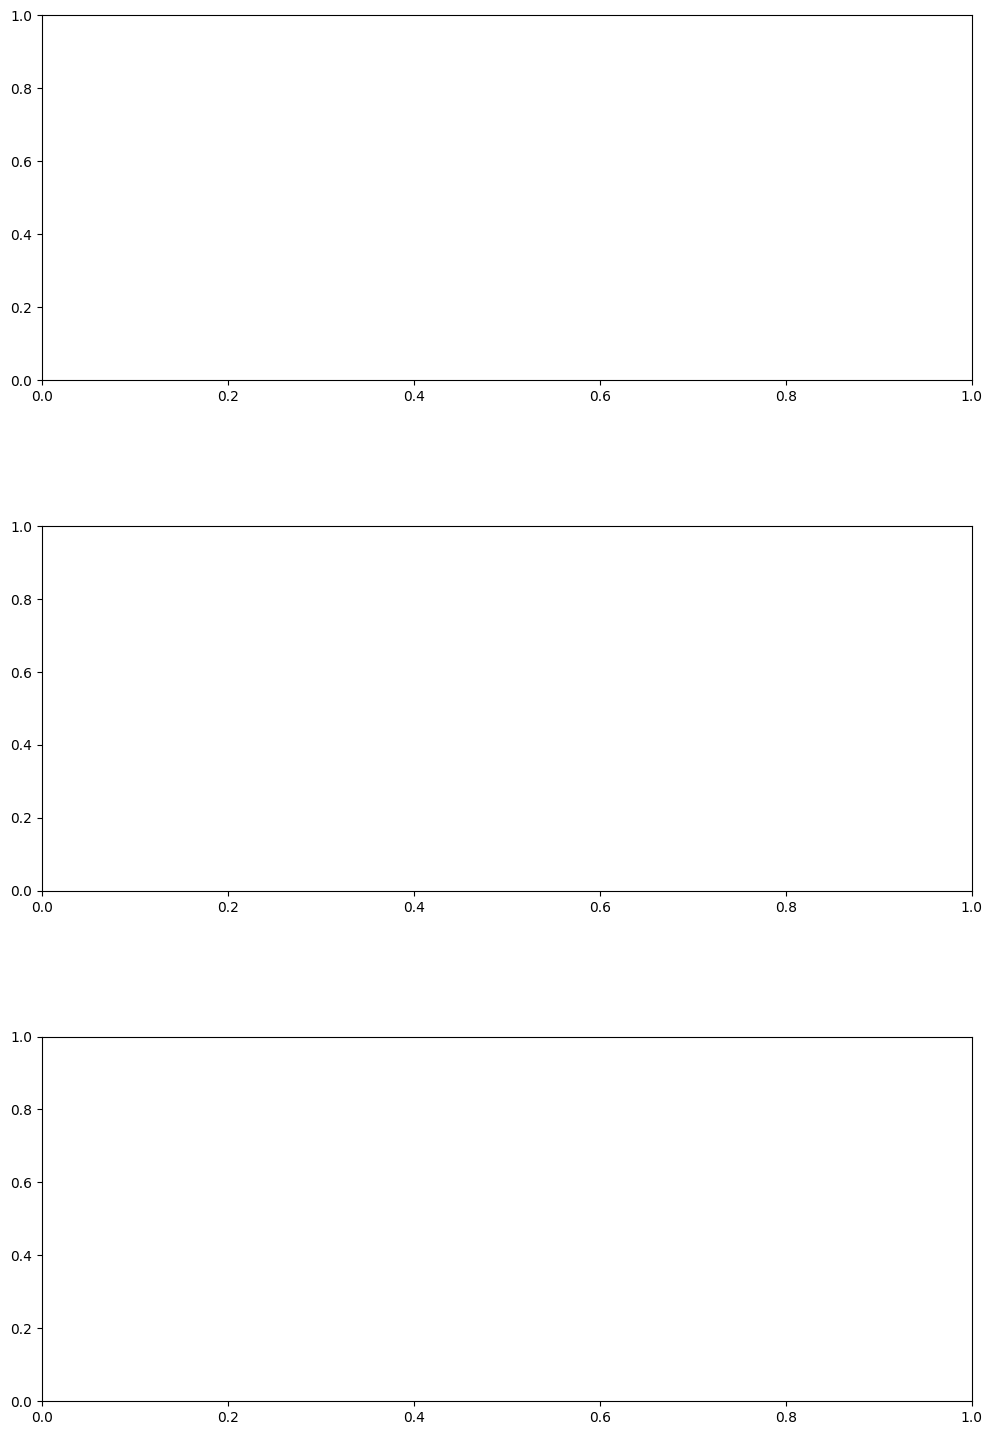

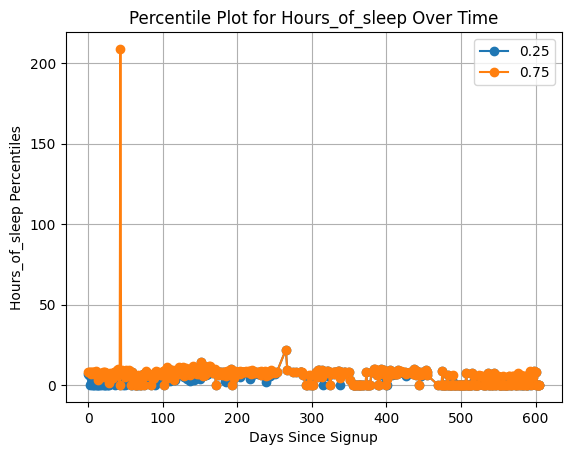

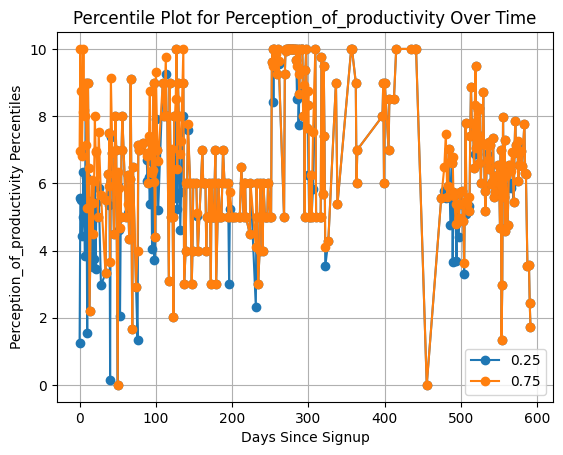

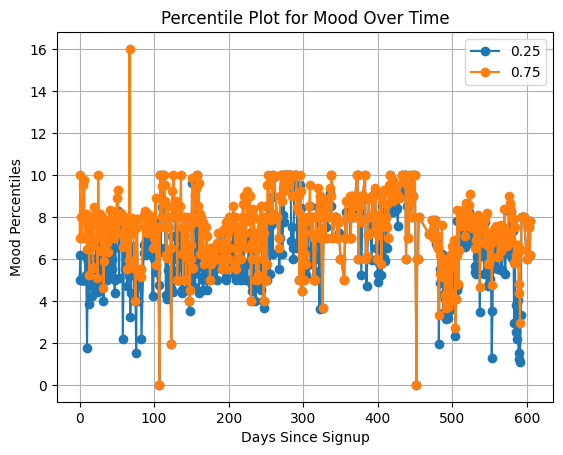

In [25]:

# List of categories to plot
categories = ["hours_of_sleep", "perception_of_productivity", "mood"]

# Setting up the plot - one subplot for each category
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(12, 18))
fig.subplots_adjust(hspace=0.4)  # Adjust vertical space between plots

for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = impact_data[impact_data['impact_category'] == category]
    
    # Group by 'days_since_signup' and calculate the average of 'logged_value'
    # Calculate percentiles
    percentiles = category_data.groupby('days_since_signup')['logged_value'].quantile([0.25, 0.75]).unstack()
    
    # Plotting
    percentiles.plot(kind='line', marker='o', linestyle='-')
    plt.title(f'Percentile Plot for {category.capitalize()} Over Time')
    plt.xlabel('Days Since Signup')
    plt.ylabel(f'{category.capitalize()} Percentiles')
    plt.grid(True)
    # plt.show()

    
    # # Plotting
    # axes[i].plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
    # axes[i].set_title(f'Average {category.capitalize()} Over Time')
    # axes[i].set_xlabel('Days Since Signup')
    # axes[i].set_ylabel(f'Average {category.capitalize()}')
    # axes[i].grid(True)

# Show the plot
plt.show()

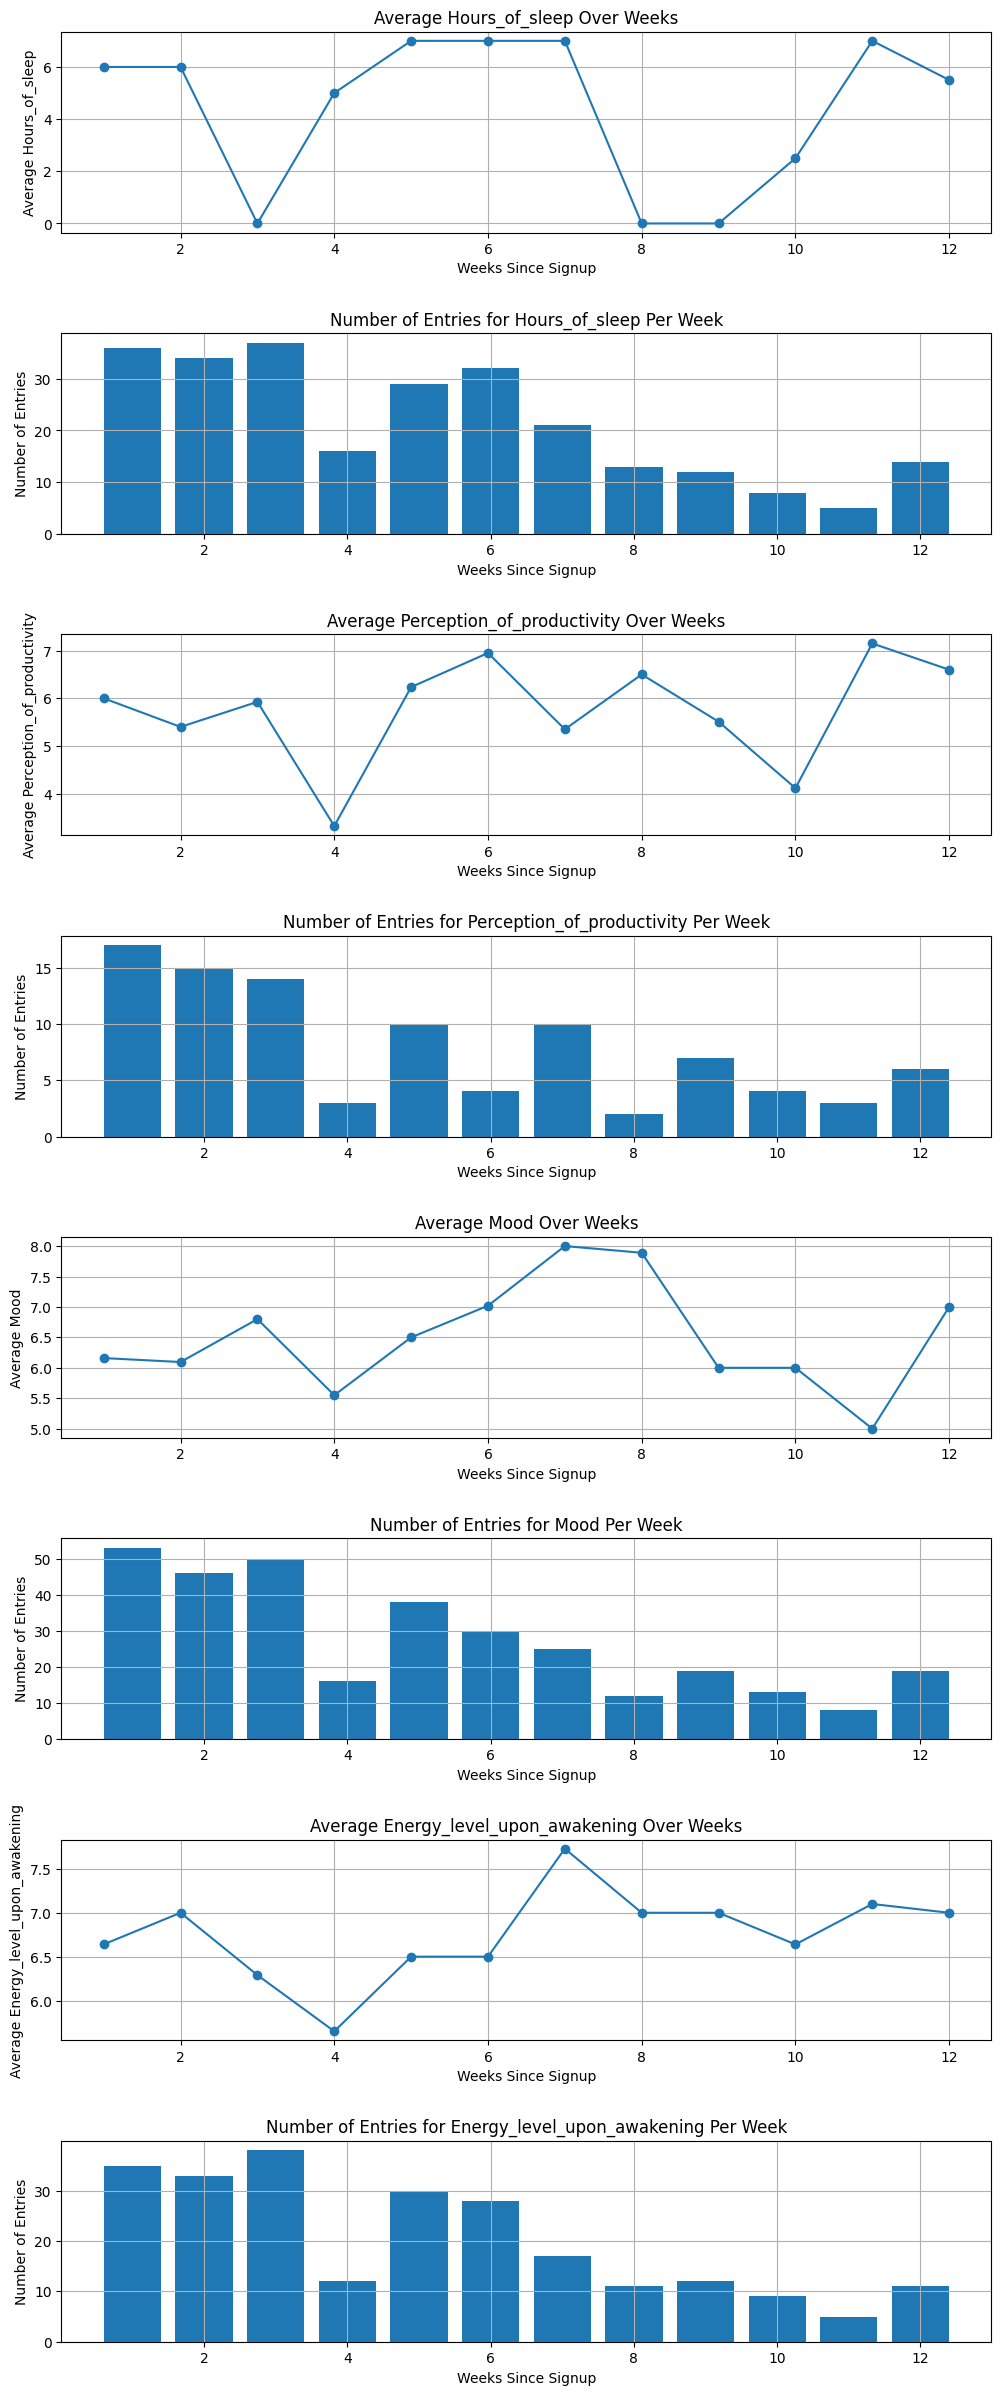

In [26]:

# Filter to include only up to 90 days
impact_data = impact_data[(impact_data['days_since_signup'] <= 90) & (impact_data['days_since_signup'] > 7)]

# Calculate weeks since signup
impact_data['weeks_since_signup'] = impact_data['days_since_signup'] // 7

# List of categories to plot
categories = ["hours_of_sleep", "perception_of_productivity", "mood", "energy_level_upon_awakening"]

# Setting up the plots - one subplot for each category for values, one for counts
fig, axes = plt.subplots(nrows=len(categories) * 2, ncols=1, figsize=(12, 30))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical space between plots

for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = impact_data[impact_data['impact_category'] == category]
    
    # Group by 'weeks_since_signup' and calculate the median of 'logged_value'
    grouped_data = category_data.groupby('weeks_since_signup')['logged_value'].median()
    
    # Plotting the median values
    ax_value = axes[2*i]  # even index for values
    ax_value.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
    ax_value.set_title(f'Average {category.capitalize()} Over Weeks')
    ax_value.set_xlabel('Weeks Since Signup')
    ax_value.set_ylabel(f'Average {category.capitalize()}')
    ax_value.grid(True)

    # Counting the number of entries per week
    weekly_counts = category_data.groupby('weeks_since_signup').size()

    # Plotting the counts
    ax_count = axes[2*i + 1]  # odd index for counts
    ax_count.bar(weekly_counts.index, weekly_counts.values)
    ax_count.set_title(f'Number of Entries for {category.capitalize()} Per Week')
    ax_count.set_xlabel('Weeks Since Signup')
    ax_count.set_ylabel('Number of Entries')
    ax_count.grid(True)

# Show the plots
plt.show()

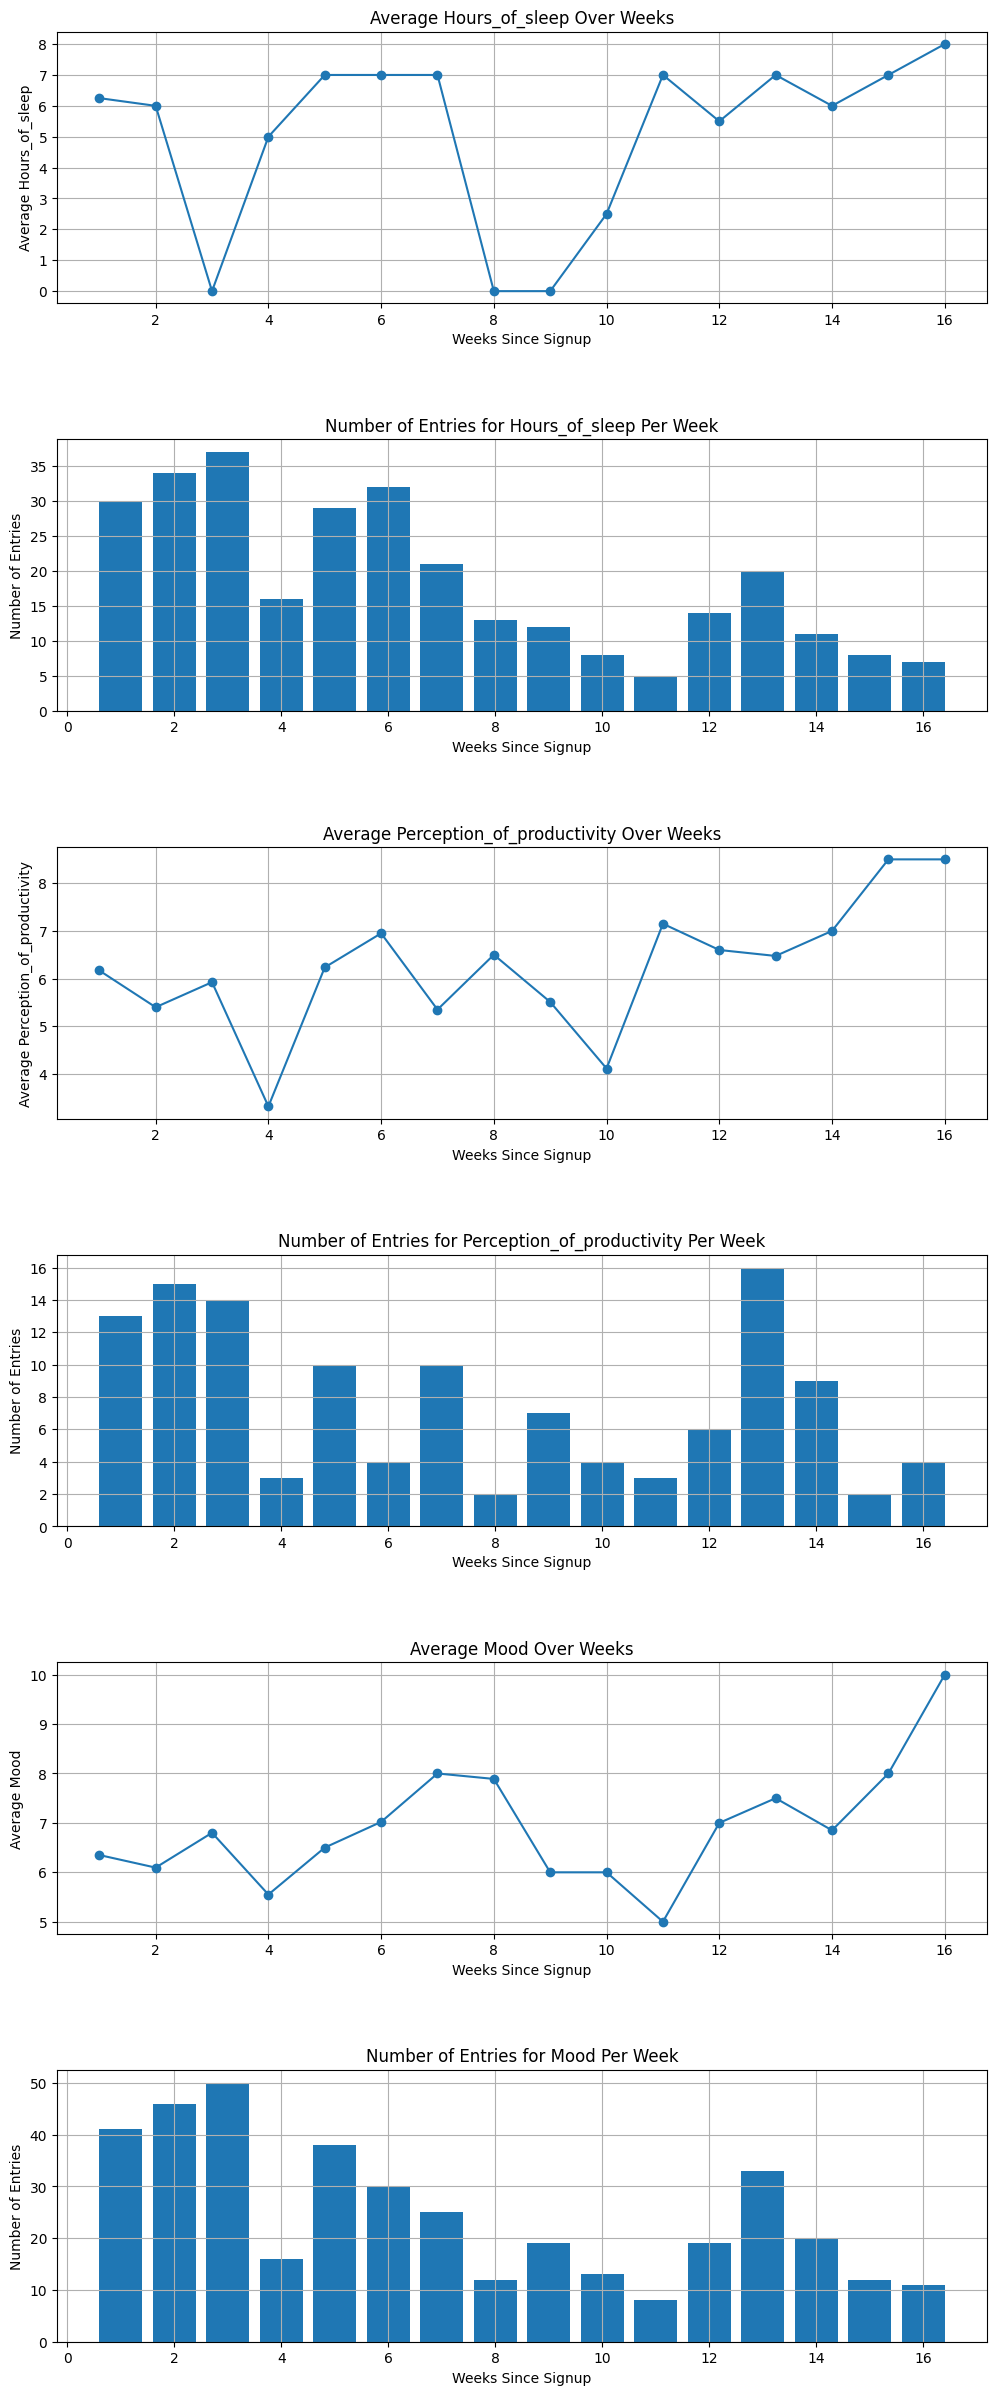

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with date parsing in UTC
file_path = './impact_data_2.csv'
impact_data = pd.read_csv(file_path, parse_dates=['log_time', 'user_created_time'])
impact_data['log_time'] = pd.to_datetime(impact_data['log_time'], format='%Y-%m-%d %H:%M:%S.%f %z', utc=True)
impact_data['user_created_time'] = pd.to_datetime(impact_data['user_created_time'], format='%Y-%m-%d %H:%M:%S.%f %z', utc=True)

# Calculate the days since signup
impact_data['days_since_signup'] = (impact_data['log_time'] - impact_data['user_created_time']).dt.days

# Filter to include only data for the first 90 days
impact_data = impact_data[(impact_data['days_since_signup'] <= 115) & (impact_data['days_since_signup'] > 0)]

# Calculate weeks since signup and exclude week 0
impact_data['weeks_since_signup'] = impact_data['days_since_signup'] // 7
impact_data = impact_data[impact_data['weeks_since_signup'] > 0]

# Identify users with at least 30 days of data
valid_users = impact_data.groupby('user_id').filter(lambda x: x['days_since_signup'].max() >= 14)['user_id'].unique()

# Filter the dataset to include only these users
impact_data = impact_data[impact_data['user_id'].isin(valid_users)]

# List of categories to plot
categories = ["hours_of_sleep", "perception_of_productivity", "mood"]

# Setting up the plots - one subplot for each category for values, one for counts
fig, axes = plt.subplots(nrows=len(categories) * 2, ncols=1, figsize=(12, 30))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical space between plots

for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = impact_data[impact_data['impact_category'] == category]
    
    # Group by 'weeks_since_signup' and calculate the median of 'logged_value'
    grouped_data = category_data.groupby('weeks_since_signup')['logged_value'].median()
    
    # Plotting the median values
    ax_value = axes[2*i]  # even index for values
    ax_value.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
    ax_value.set_title(f'Average {category.capitalize()} Over Weeks')
    ax_value.set_xlabel('Weeks Since Signup')
    ax_value.set_ylabel(f'Average {category.capitalize()}')
    ax_value.grid(True)

    # Counting the number of entries per week
    weekly_counts = category_data.groupby('weeks_since_signup').size()

    # Plotting the counts
    ax_count = axes[2*i + 1]  # odd index for counts
    ax_count.bar(weekly_counts.index, weekly_counts.values)
    ax_count.set_title(f'Number of Entries for {category.capitalize()} Per Week')
    ax_count.set_xlabel('Weeks Since Signup')
    ax_count.set_ylabel('Number of Entries')
    ax_count.grid(True)

# Show the plots
plt.show()


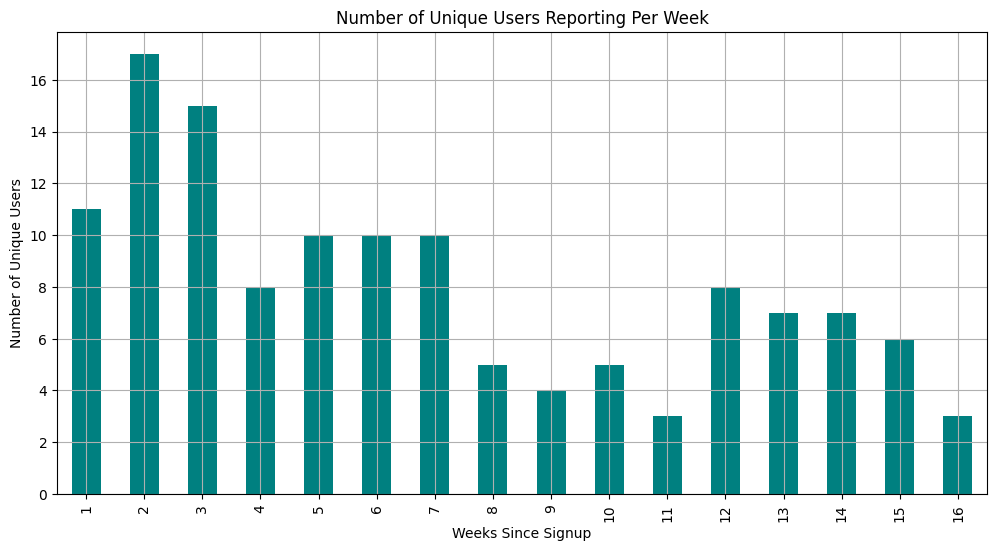

In [28]:
# Calculate the number of unique users per week
unique_users_per_week = impact_data.groupby('weeks_since_signup')['user_id'].nunique()

# Plotting unique users per week
plt.figure(figsize=(12, 6))
unique_users_per_week.plot(kind='bar', color='teal')
plt.title('Number of Unique Users Reporting Per Week')
plt.xlabel('Weeks Since Signup')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.show()

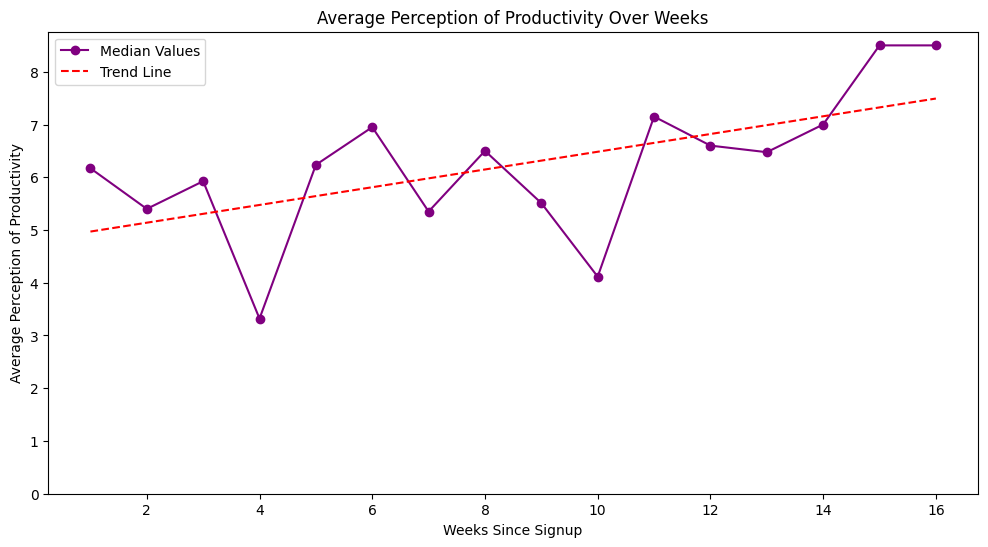

In [29]:
import numpy as np
# Filter data for the "perception_of_productivity" category
category_data = impact_data[impact_data['impact_category'] == "perception_of_productivity"]

# Group by 'weeks_since_signup' and calculate the median of 'logged_value'
grouped_data = category_data.groupby('weeks_since_signup')['logged_value'].median()

plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='purple', label='Median Values')

# Adding a trend line
z = np.polyfit(grouped_data.index, grouped_data.values, 1)  # 1st degree polynomial
p = np.poly1d(z)
plt.plot(grouped_data.index, p(grouped_data.index), "r--", label='Trend Line')  # Add the trend line

# Customize the plot
plt.title('Average Perception of Productivity Over Weeks')
plt.xlabel('Weeks Since Signup')
plt.ylabel('Average Perception of Productivity')
plt.legend()  # Add a legend

# Save the figure to a file without grid lines
plt.grid(False)  # Turn off the grid

plt.ylim(bottom=0)
# Save the figure to a file
plt.savefig('perception_of_productivity_over_weeks.png')

# Show the plot
plt.show()